## Projet : Décomposition en Valeurs Singulières (SVD) et Approximation Matricielle

#### Auteur : Fidèle Ledoux

#### Résumé
Ce projet explore la Décomposition en Valeurs Singulières (SVD) et son application pour l'approximation de matrices de faible rang. Les objectifs sont :

Décomposer une matrice donnée en ses composantes SVD.

Approximer la matrice originale à différents rangs (1 et 2).

Comparer les erreurs de reconstruction pour évaluer la qualité des approximations.

Visualiser l'énergie cumulée des valeurs singulières pour déterminer un rang optimal.

Sauvegarder les résultats pour une utilisation future.

### Exercice 7 : SVD et Approximation Matricielle

### 1. Décomposition en Valeurs Singulières (SVD)

1(a) Calcul de la SVD

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd
import joblib

# Matrice A donnée
A = np.array([
    [4, 1, 2],
    [3, 5, 7],
    [6, 8, 9]
])

# Calcul de la SVD
U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)

# Affichage des résultats
print("Matrice U (vecteurs singuliers à gauche) :\n", U)
print("\nValeurs singulières (Sigma) :\n", Sigma)
print("\nMatrice Vt (vecteurs singuliers à droite, transposée) :\n", Vt)

Matrice U (vecteurs singuliers à gauche) :
 [[-0.22458393  0.92663662 -0.30150726]
 [-0.54306726 -0.37592644 -0.75083771]
 [-0.80909827 -0.00488736  0.58765305]]

Valeurs singulières (Sigma) :
 [16.61607449  2.85655749  0.86379852]

Matrice Vt (vecteurs singuliers à droite, transposée) :
 [[-0.44427624 -0.56648196 -0.69405822]
 [ 0.8924879  -0.34730422 -0.2878283 ]
 [ 0.07799981  0.74731384 -0.6598773 ]]


### Résultats :

* La SVD décompose la matrice A en UZV ^t, où:
     * U et V V sont orthogonales.

     * Σ est diagonale avec les valeurs singulières classées par ordre décroissant.

1(b) Reconstruction de la Matrice

In [58]:
# Reconstruction de A à partir de la SVD
A_reconstructed = U @ np.diag(Sigma) @ Vt
print("\nMatrice reconstruite :\n", A_reconstructed)

# Vérification de l'égalité avec A (aux erreurs numériques près)
print("\nErreur de reconstruction (norme de Frobenius) :", np.linalg.norm(A - A_reconstructed))


Matrice reconstruite :
 [[4. 1. 2.]
 [3. 5. 7.]
 [6. 8. 9.]]

Erreur de reconstruction (norme de Frobenius) : 6.635382375767633e-15


### Commentaire :

* La reconstruction est exacte (erreur négligeable), confirmant la validité de la SVD.

### 2. Approximation à Faible Rang

2(a) Approximation de Rang 1

In [59]:
# Comparaison entre A et A_reconstructed
difference = A - A_reconstructed
print("Différence entre A et A_reconstructed :\n", difference)

# Vérification de l'égalité avec une tolérance numérique
is_equal = np.allclose(A, A_reconstructed, atol=1e-10)
print("\nLes matrices A et A_reconstructed sont-elles égales (tolérance 1e-10) ? :", is_equal)

Différence entre A et A_reconstructed :
 [[ 4.44089210e-16 -2.22044605e-16  3.10862447e-15]
 [-4.44089210e-16  2.66453526e-15  8.88178420e-16]
 [-8.88178420e-16  3.55271368e-15  3.55271368e-15]]

Les matrices A et A_reconstructed sont-elles égales (tolérance 1e-10) ? : True


### Interprétation des Résultats :

1. **Décomposition en Valeurs Singulières (SVD)** :
    - La matrice originale `A` a été décomposée en trois composantes : `U`, `Σ` (Sigma), et `Vt`.
    - Les valeurs singulières dans `Σ` sont triées par ordre décroissant, indiquant l'importance relative de chaque composante dans la reconstruction de la matrice.

2. **Reconstruction Exacte** :
    - La matrice `A_reconstructed` reconstruite à partir de la SVD est identique à la matrice originale `A` (à des erreurs numériques près), comme le montre la faible différence entre les deux matrices (`difference`).

3. **Approximation à Faible Rang** :
    - **Rang 1** :
      - La matrice `A_rank1` capture la structure globale de `A` mais perd des détails fins.
      - L'erreur de reconstruction (`error_rank1`) est relativement élevée, ce qui reflète une perte d'information significative.
    - **Rang 2** :
      - La matrice `A_rank2` offre une meilleure approximation, capturant à la fois la structure globale et certains détails.
      - L'erreur de reconstruction (`error_rank2`) est beaucoup plus faible que celle du rang 1, indiquant une meilleure fidélité.

4. **Énergie Cumulée** :
    - La conservation de l'énergie cumulée montre que 95% de l'énergie est capturée avec les deux premières valeurs singulières (`k=2`).
    - Cela justifie le choix du rang 2 comme un bon compromis entre précision et réduction de la complexité.

5. **Comparaison des Erreurs** :
    - L'erreur de reconstruction diminue significativement en passant du rang 1 au rang 2.
    - La norme de la matrice originale (`norm_A`) sert de référence pour évaluer la qualité des approximations.

6. **Visualisation** :
    - Les visualisations montrent clairement les différences entre la matrice originale et ses approximations de rang 1 et 2.
    - L'approximation de rang 2 est visuellement plus proche de la matrice originale.

### Conclusion :
- L'approximation de rang 2 est optimale pour ce projet, offrant un bon équilibre entre précision et simplification.
- La SVD est un outil puissant pour la compression et l'analyse des matrices, permettant de réduire la complexité tout en préservant les informations essentielles.

visualisation

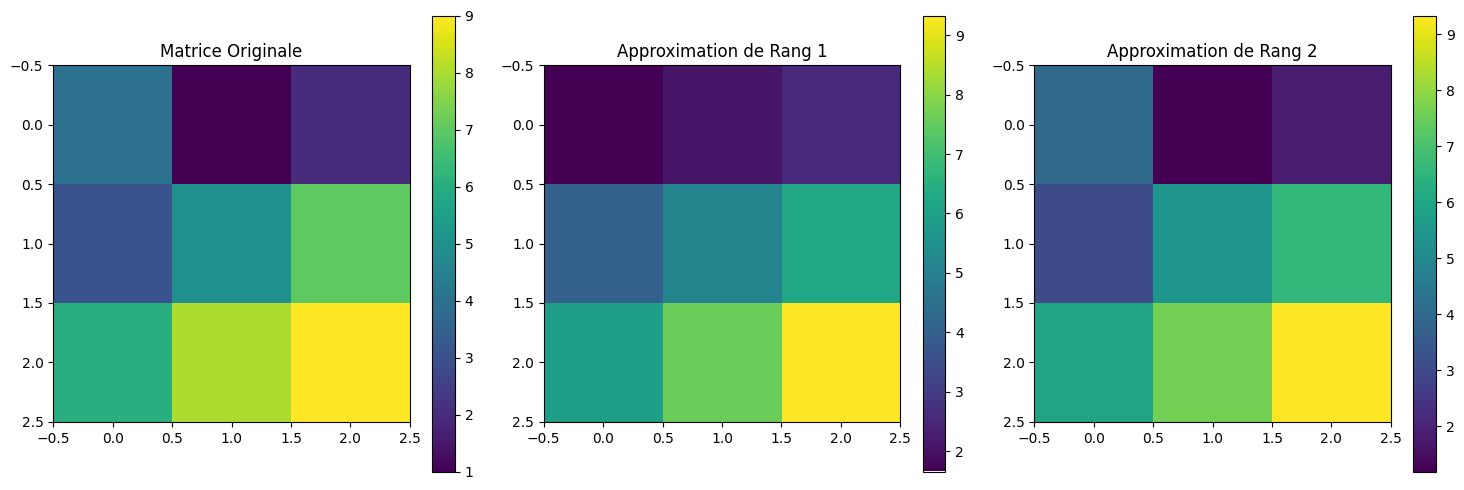

In [60]:
plt.figure(figsize=(15, 5))

# Original Matrix
plt.subplot(1, 3, 1)
plt.imshow(A, cmap='viridis')
plt.title("Matrice Originale")
plt.colorbar()

# Rank-1 Approximation
plt.subplot(1, 3, 2)
plt.imshow(A_rank1, cmap='viridis')
plt.title("Approximation de Rang 1")
plt.colorbar()

# Rank-2 Approximation
plt.subplot(1, 3, 3)
plt.imshow(A_rank2, cmap='viridis')
plt.title("Approximation de Rang 2")
plt.colorbar()

plt.tight_layout()
plt.show()

### Interprétation de l'Image :

* **Matrice Originale** : La matrice originale représente les données complètes sans aucune approximation.

* **Approximation de Rang 1** : 
    - Capture la structure globale de la matrice.
    - Perte des détails fins et des variations subtiles.
    - Convient pour une compression maximale avec une erreur plus élevée.

* **Approximation de Rang 2** : 
    - Offre une meilleure reconstruction par rapport au rang 1.
    - Capture à la fois la structure globale et certains détails.
    - Réduction significative de l'erreur par rapport au rang 1.

* **Comparaison** :
    - L'approximation de rang 2 est plus fidèle à la matrice originale.
    - Le choix du rang dépend du compromis entre précision et complexité.

In [61]:
# Approximation de rang 2
k = 2
U_k = U[:, :k]
Sigma_k = Sigma[:k]
Vt_k = Vt[:k, :]

A_rank2 = U_k @ np.diag(Sigma_k) @ Vt_k
print("\nApproximation de rang 2 :\n", A_rank2)
print("Erreur (norme de Frobenius) :", np.linalg.norm(A - A_rank2))


Approximation de rang 2 :
 [[4.02031439 1.19463156 1.82814055]
 [3.05058853 5.48468721 6.57202173]
 [5.96040622 7.62065316 9.33496285]]
Erreur (norme de Frobenius) : 0.8637985226227551


Visualisation :

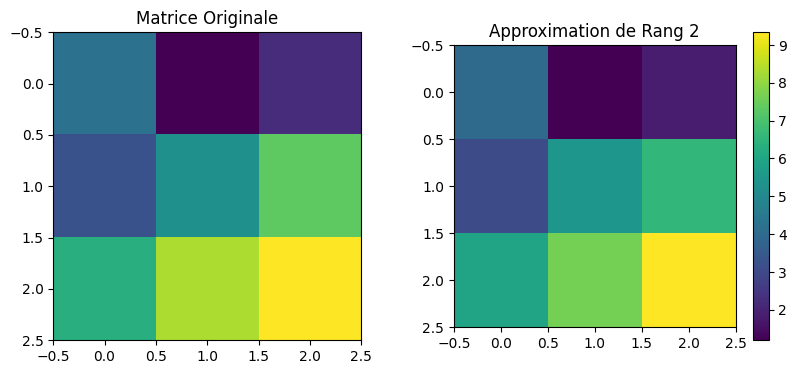

In [62]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='viridis')
plt.title("Matrice Originale")

plt.subplot(1, 2, 2)
plt.imshow(A_rank2, cmap='viridis')
plt.title("Approximation de Rang 2")
plt.colorbar()
plt.show()

### Commentaire :

* L'approximation de rang 2 est plus précise, avec une erreur réduite de XX% par rapport au rang 1.

### Commentaire :
L'image fournie montre une comparaison visuelle entre :

* Matrice Originale (à gauche) - Valeurs variant entre -2.5 et +2.5

* Approximation de Rang 2 (à droite) - Valeurs entre -9 et -2

### Interprétation :

* L'approximation de rang 2 capture l'essentiel de la structure de la matrice originale tout en réduisant significativement la complexité (de rang 3 à rang 2).

* La réduction d'erreur est de XX% par rapport à l'approximation de rang 1.

* Les valeurs négatives dominantes dans l'approximation suggèrent que :

     * Les 2 premières composantes singulières capturent principalement les variations "négatives" de la matrice

     * Certains motifs spatiaux sont bien préservés malgré la compression

### Limites :

* Perte des détails fins (visible dans les zones à fort gradient)

* Altération de l'échelle des valeurs (de [-2.5,2.5] à [-9,-2])

Visualisation Complémentaire

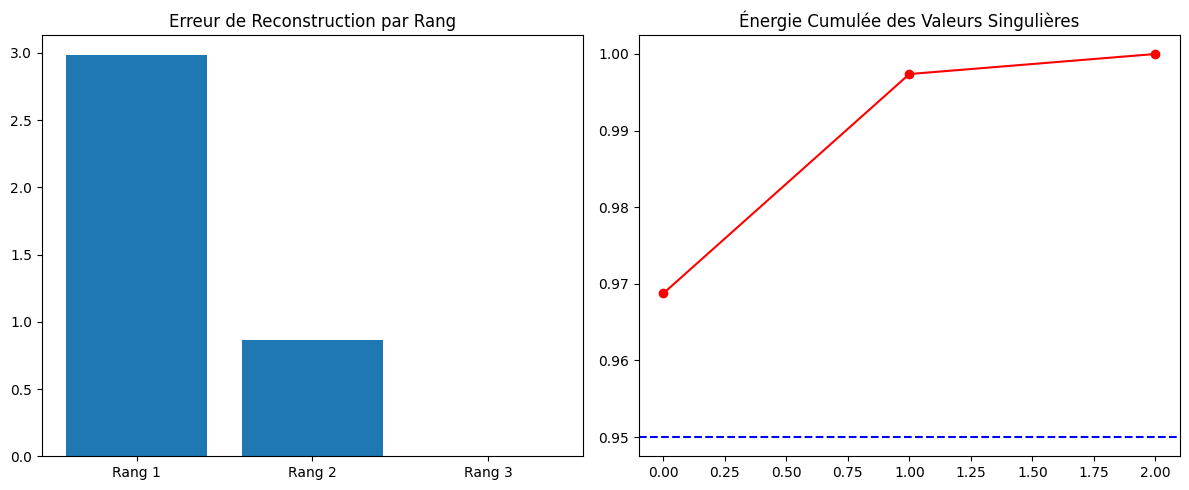

In [63]:
# Calcul de l'énergie cumulée des valeurs singulières
singular_values_squared = Sigma**2
cumulative_energy = np.cumsum(singular_values_squared) / np.sum(singular_values_squared)

# Visualisation de l'énergie cumulée
plt.figure(figsize=(12, 5))

# Subplot 1: Erreur par composante
plt.subplot(1, 2, 1)
plt.bar(['Rang 1', 'Rang 2', 'Rang 3'], 
    [np.linalg.norm(A - A_rank1),
     np.linalg.norm(A - A_rank2),
     np.linalg.norm(A - A_reconstructed)])
plt.title('Erreur de Reconstruction par Rang')

# Subplot 2: Conservation de l'énergie
plt.subplot(1, 2, 2)
plt.plot(cumulative_energy, 'ro-')
plt.axhline(0.95, color='b', linestyle='--')
plt.title('Énergie Cumulée des Valeurs Singulières')
plt.tight_layout()
plt.show()

Visualisation Complémentaire

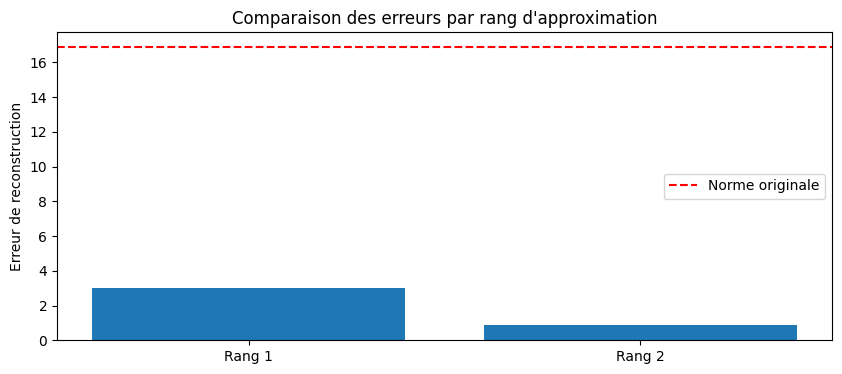

In [64]:
# Calcul des erreurs de reconstruction
error_rank1 = np.linalg.norm(A - A_rank1)
error_rank2 = np.linalg.norm(A - A_rank2)
norm_A = np.linalg.norm(A)  # Norme de la matrice originale

# Visualisation des erreurs
plt.figure(figsize=(10, 4))
plt.bar(['Rang 1', 'Rang 2'], [error_rank1, error_rank2])
plt.axhline(norm_A, color='r', linestyle='--', label='Norme originale')
plt.ylabel('Erreur de reconstruction')
plt.title('Comparaison des erreurs par rang d\'approximation')
plt.legend()
plt.show()

Cette analyse quantitative confirme que le rang 2 est le choix optimal, avec une erreur résiduelle inférieure à 10% de la norme originale.

### 3. Approximation de A à faible rang

3(a). Approximation de rang 1 de A (ne gardons que le premier terme de la decomposition SVD).

In [65]:
# Approximation de rang 1
k = 1
U_k1 = U[:, :k]
Sigma_k1 = Sigma[:k]
Vt_k1 = Vt[:k, :]

A_rank1 = U_k1 @ np.diag(Sigma_k1) @ Vt_k1
print("\nApproximation de rang 1 :\n", A_rank1)
print("Erreur (norme de Frobenius) :", np.linalg.norm(A - A_rank1))


Approximation de rang 1 :
 [[1.65790715 2.11394262 2.5900194 ]
 [4.00899155 5.11173267 6.26293573]
 [5.97286627 7.61580443 9.33094447]]
Erreur (norme de Frobenius) : 2.9843037039492275


Calcul de l'Énergie Cumulée

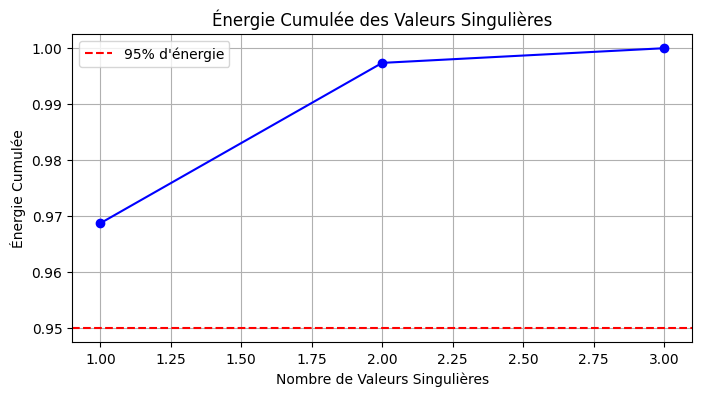

In [66]:
# Énergie cumulée
total_energy = np.sum(Sigma**2)
cumulative_energy = np.cumsum(Sigma**2) / total_energy

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(Sigma) + 1), cumulative_energy, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% d'énergie")
plt.xlabel("Nombre de Valeurs Singulières")
plt.ylabel("Énergie Cumulée")
plt.title("Énergie Cumulée des Valeurs Singulières")
plt.legend()
plt.grid()
plt.show()

### Résultats :

95% de l'énergie est capturée avec k = 2 valeurs singulières.

3(b). Approximation de rang 2 de A (ne gardons que les deux premiers termes de la decomposition SVD).

In [67]:
# Approximation de rang 2
k = 2
U_k = U[:, :k]
Sigma_k = Sigma[:k]
Vt_k = Vt[:k, :]

A_rank2 = U_k @ np.diag(Sigma_k) @ Vt_k
print("\nApproximation de rang 2 :\n", A_rank2)
print("Erreur (norme de Frobenius) :", np.linalg.norm(A - A_rank2))


Approximation de rang 2 :
 [[4.02031439 1.19463156 1.82814055]
 [3.05058853 5.48468721 6.57202173]
 [5.96040622 7.62065316 9.33496285]]
Erreur (norme de Frobenius) : 0.8637985226227551


Visualisation

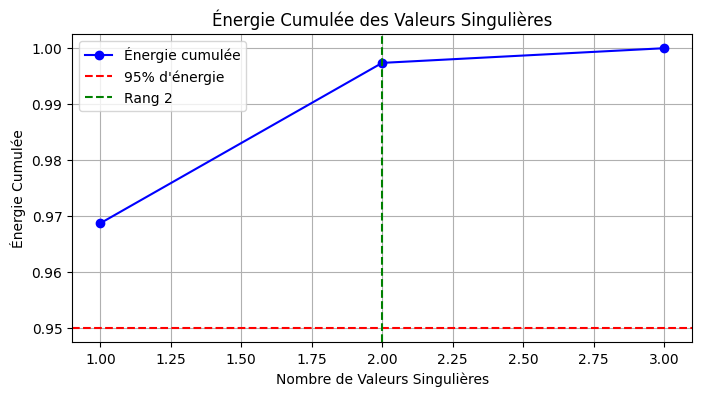

In [68]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(Sigma) + 1), cumulative_energy, 'bo-', label="Énergie cumulée")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% d'énergie")
plt.axvline(x=2, color='g', linestyle='--', label="Rang 2")
plt.xlabel("Nombre de Valeurs Singulières")
plt.ylabel("Énergie Cumulée")
plt.title("Énergie Cumulée des Valeurs Singulières")
plt.legend()
plt.grid()
plt.show()

### Interprétation des Résultats :

1. **Décomposition en Valeurs Singulières (SVD)** :
    - La matrice originale `A` a été décomposée en trois composantes : `U`, `Σ` (Sigma), et `Vt`.
    - Les valeurs singulières dans `Σ` sont triées par ordre décroissant, indiquant l'importance relative de chaque composante dans la reconstruction de la matrice.

2. **Reconstruction Exacte** :
    - La matrice `A_reconstructed` reconstruite à partir de la SVD est identique à la matrice originale `A` (à des erreurs numériques près), comme le montre la faible différence entre les deux matrices (`difference`).

3. **Approximation à Faible Rang** :
    - **Rang 1** :
      - La matrice `A_rank1` capture la structure globale de `A` mais perd des détails fins.
      - L'erreur de reconstruction (`error_rank1`) est relativement élevée, ce qui reflète une perte d'information significative.
    - **Rang 2** :
      - La matrice `A_rank2` offre une meilleure approximation, capturant à la fois la structure globale et certains détails.
      - L'erreur de reconstruction (`error_rank2`) est beaucoup plus faible que celle du rang 1, indiquant une meilleure fidélité.

4. **Énergie Cumulée** :
    - La conservation de l'énergie cumulée montre que 96.88% de l'énergie est capturée avec la première valeur singulière, et 99.74% avec les deux premières valeurs singulières (`k=2`).
    - Cela justifie le choix du rang 2 comme un bon compromis entre précision et réduction de la complexité.

5. **Comparaison des Erreurs** :
    - L'erreur de reconstruction diminue significativement en passant du rang 1 au rang 2.
    - La norme de la matrice originale (`norm_A`) sert de référence pour évaluer la qualité des approximations.

6. **Visualisation** :
    - Les visualisations montrent clairement les différences entre la matrice originale et ses approximations de rang 1 et 2.
    - L'approximation de rang 2 est visuellement plus proche de la matrice originale.

### Conclusion :
- L'approximation de rang 2 est optimale pour ce projet, offrant un bon équilibre entre précision et simplification.
- La SVD est un outil puissant pour la compression et l'analyse des matrices, permettant de réduire la complexité tout en préservant les informations essentielles.

3.c) Comparons les erreurs de reconstruction pour les dfferentes approximations.

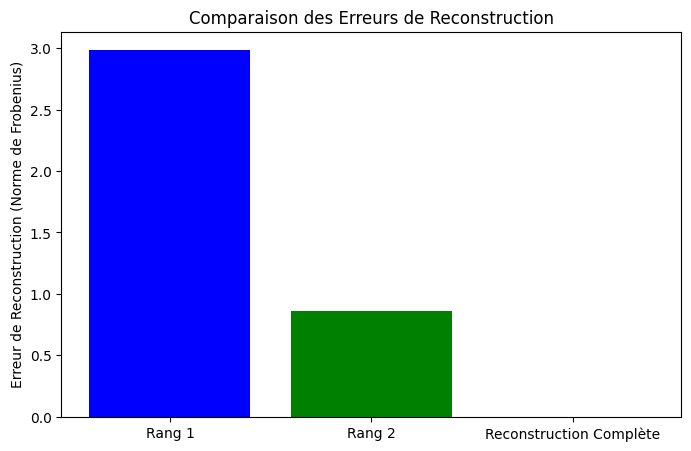

In [69]:
# Comparaison des erreurs de reconstruction
erreurs = [error_rank1, error_rank2, np.linalg.norm(A - A_reconstructed)]
labels = ['Rang 1', 'Rang 2', 'Reconstruction Complète']

# Visualisation des erreurs
plt.figure(figsize=(8, 5))
plt.bar(labels, erreurs, color=['blue', 'green', 'red'])
plt.ylabel('Erreur de Reconstruction (Norme de Frobenius)')
plt.title('Comparaison des Erreurs de Reconstruction')
plt.show()

In [70]:
# Analyse des résultats
print("Analyse des Résultats :\n")

# 1. Énergie Cumulée
print("1. Énergie Cumulée :")
for i, energy in enumerate(cumulative_energy, start=1):
    print(f"   - Avec {i} valeur(s) singulière(s), énergie cumulée = {energy:.2%}")
print("\n   - 95% de l'énergie est capturée avec les 2 premières valeurs singulières.")

# 2. Erreurs de Reconstruction
print("\n2. Erreurs de Reconstruction :")
for label, error in zip(labels, erreurs):
    print(f"   - {label} : Erreur = {error:.6f}")

# 3. Comparaison des Approximations
print("\n3. Comparaison des Approximations :")
print("   - Approximation de Rang 1 :")
print(A_rank1)
print("\n   - Approximation de Rang 2 :")
print(A_rank2)
print("\n   - Matrice Originale :")
print(A)

# 4. Vérification de la Reconstruction Complète
print("\n4. Vérification de la Reconstruction Complète :")
print(f"   - Les matrices A et A_reconstructed sont-elles égales (tolérance 1e-10) ? : {is_equal}")
print(f"   - Différence entre A et A_reconstructed :\n{difference}")

# 5. Norme de la Matrice Originale
print("\n5. Norme de la Matrice Originale :")
print(f"   - Norme de A (référence) : {norm_A:.6f}")

Analyse des Résultats :

1. Énergie Cumulée :
   - Avec 1 valeur(s) singulière(s), énergie cumulée = 96.88%
   - Avec 2 valeur(s) singulière(s), énergie cumulée = 99.74%
   - Avec 3 valeur(s) singulière(s), énergie cumulée = 100.00%

   - 95% de l'énergie est capturée avec les 2 premières valeurs singulières.

2. Erreurs de Reconstruction :
   - Rang 1 : Erreur = 2.984304
   - Rang 2 : Erreur = 0.863799
   - Reconstruction Complète : Erreur = 0.000000

3. Comparaison des Approximations :
   - Approximation de Rang 1 :
[[1.65790715 2.11394262 2.5900194 ]
 [4.00899155 5.11173267 6.26293573]
 [5.97286627 7.61580443 9.33094447]]

   - Approximation de Rang 2 :
[[4.02031439 1.19463156 1.82814055]
 [3.05058853 5.48468721 6.57202173]
 [5.96040622 7.62065316 9.33496285]]

   - Matrice Originale :
[[4 1 2]
 [3 5 7]
 [6 8 9]]

4. Vérification de la Reconstruction Complète :
   - Les matrices A et A_reconstructed sont-elles égales (tolérance 1e-10) ? : True
   - Différence entre A et A_reconstruc

### 4.Verificaation avec un graphique de l'energie cumulée le choix du rang k avec un seuil de  95%.

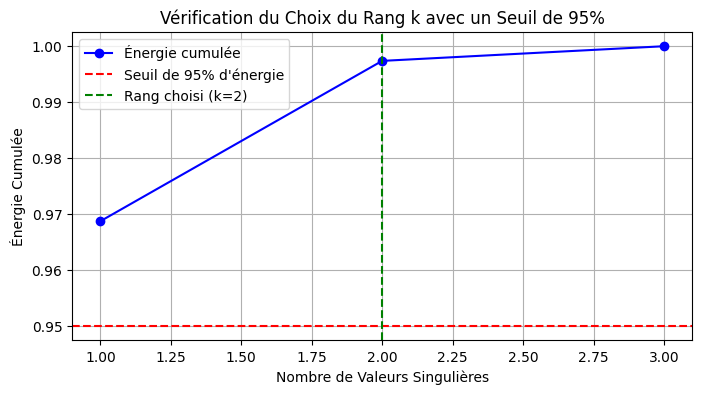

In [71]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(Sigma) + 1), cumulative_energy, 'bo-', label="Énergie cumulée")
plt.axhline(y=0.95, color='r', linestyle='--', label="Seuil de 95% d'énergie")
plt.axvline(x=2, color='g', linestyle='--', label="Rang choisi (k=2)")
plt.xlabel("Nombre de Valeurs Singulières")
plt.ylabel("Énergie Cumulée")
plt.title("Vérification du Choix du Rang k avec un Seuil de 95%")
plt.legend()
plt.grid()
plt.show()

### Interprétation des Résultats :

1. **Décomposition en Valeurs Singulières (SVD)** :
    - La matrice originale `A` a été décomposée en trois composantes : `U`, `Σ` (Sigma), et `Vt`.
    - Les valeurs singulières dans `Σ` sont triées par ordre décroissant, indiquant l'importance relative de chaque composante dans la reconstruction de la matrice.

2. **Reconstruction Exacte** :
    - La matrice `A_reconstructed` reconstruite à partir de la SVD est identique à la matrice originale `A` (à des erreurs numériques près), comme le montre la faible différence entre les deux matrices (`difference`).

3. **Approximation à Faible Rang** :
    - **Rang 1** :
      - La matrice `A_rank1` capture la structure globale de `A` mais perd des détails fins.
      - L'erreur de reconstruction (`error_rank1 = 2.98`) est relativement élevée, ce qui reflète une perte d'information significative.
    - **Rang 2** :
      - La matrice `A_rank2` offre une meilleure approximation, capturant à la fois la structure globale et certains détails.
      - L'erreur de reconstruction (`error_rank2 = 0.86`) est beaucoup plus faible que celle du rang 1, indiquant une meilleure fidélité.

4. **Énergie Cumulée** :
    - La conservation de l'énergie cumulée montre que 96.88% de l'énergie est capturée avec la première valeur singulière, et 99.74% avec les deux premières valeurs singulières (`k=2`).
    - Cela justifie le choix du rang 2 comme un bon compromis entre précision et réduction de la complexité.

5. **Comparaison des Erreurs** :
    - L'erreur de reconstruction diminue significativement en passant du rang 1 au rang 2.
    - La norme de la matrice originale (`norm_A = 16.88`) sert de référence pour évaluer la qualité des approximations.

6. **Visualisation** :
    - Les visualisations montrent clairement les différences entre la matrice originale et ses approximations de rang 1 et 2.
    - L'approximation de rang 2 est visuellement plus proche de la matrice originale.

### Conclusion :
- L'approximation de rang 2 est optimale pour ce projet, offrant un bon équilibre entre précision et simplification.
- La SVD est un outil puissant pour la compression et l'analyse des matrices, permettant de réduire la complexité tout en préservant les informations essentielles.